In [ ]:
from qiskit import QuantumCircuit
 
circ = QuantumCircuit(1, 1)
circ.x(0)
circ.measure(0, 0)
 
circ.draw('mpl')    

In [ ]:
from qiskit import pulse
from qiskit.pulse.library import Gaussian
from qiskit.providers.fake_provider import FakeValencia
 
backend = FakeValencia()
 
with pulse.build() as x_gate:
    pulse.play(
        pulse.library.Gaussian(duration=64, amp=0.4, sigma=50, name="custom_x"),
        pulse.DriveChannel(0)
    )

In [ ]:
x_gate.draw()

In [ ]:
circ.add_calibration('x', [0], x_gate)

In [ ]:
circ.draw('mpl')

## Run custom pulse-level calibration for x-gate on OQC quantum computer (x-gate is a native gate)

/Users/lukasvoss/anaconda3/envs/braket/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


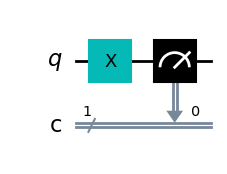

In [1]:
from qiskit import QuantumCircuit, pulse
from qiskit.circuit import Gate
from qiskit.providers.fake_provider import FakeHanoi
from qiskit.pulse.library import Gaussian
from qiskit.qasm3 import dumps, ExperimentalFeatures, loads


circ = QuantumCircuit(1, 1)
circ.x(0)
circ.measure([0], [0])

circ.draw("mpl")

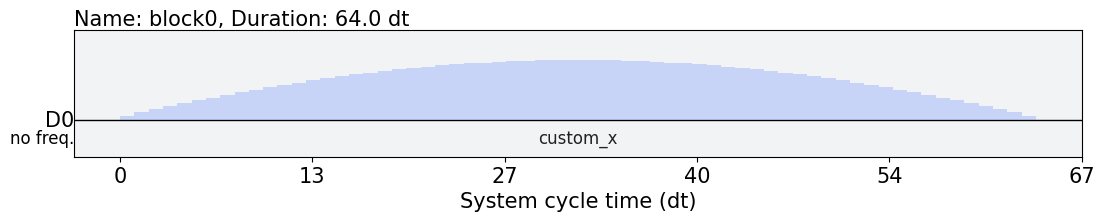

In [2]:
qasm_string_pre_calibration = dumps(circ, experimental=ExperimentalFeatures.SWITCH_CASE_V1)

with pulse.build() as x_gate:
    pulse.play(
        pulse.library.Gaussian(duration=64, amp=0.4, sigma=50, name="custom_x"),
        pulse.DriveChannel(0)
    )
circ.add_calibration('x', [0], x_gate)
x_gate.draw()

/Users/lukasvoss/anaconda3/envs/braket/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


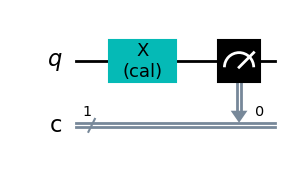

In [3]:
circ.draw("mpl")

In [4]:
qasm_string_post_calibration = dumps(circ, experimental=ExperimentalFeatures.SWITCH_CASE_V1)

In [5]:
qasm_string_pre_calibration == qasm_string_post_calibration

True

In [6]:
qasm_string_post_calibration

'OPENQASM 3;\ninclude "stdgates.inc";\nbit[1] c;\nqubit[1] q;\nx q[0];\nc[0] = measure q[0];\n'

After reading in the QASM 3 string, the own pulse-calibration of the gate is lost. This indicates that dumping a qiskit circuit to a QASM 3 file does NOT include own calibrations.

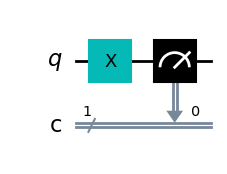

In [7]:
circuit = loads(qasm_string_post_calibration)
circuit.draw("mpl")

### Run QASM3 program on Braket QPU

In [ ]:
# import the device module
from braket.aws import AwsDevice, AwsQuantumJob, AwsSession
from braket.ir.openqasm import Program
from braket import pulse

aws_session = AwsSession(default_bucket="amazon-braket-us-west-1-lukasvoss")

In [ ]:
with open("pulse.qasm", "r") as pulse:
    pulse_qasm_string = pulse.read()

# choose the OQC device (Rigetti is currently under maintenance)
device = AwsDevice("arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy")

program = Program(source=pulse_qasm_string)

# You can also specify an optional s3 bucket location and number of shots,
# if you so choose, when running the program
s3_location = ("amazon-braket-my-bucket", "openqasm-tasks")

In [ ]:
# my_task = device.run(
#     program,
#     # s3_location,
#     shots=100,
# )

In [ ]:
my_task.state()